# Public Relation Department Case Studies

1. Learn how to leverage the power of data science to deal with text data
2. Perform exploratory data analysis and learn how to create WordCloud visualizations
3. Learn the basics of Natural Language Toolkit or NLTK for short to perform tokenization.
4. Apply feature extraction using count vectorizer.
5. Understand the theory behind naive Bayes classifiers.
6. Understand the difference between likelihood, prior probability and marginal likelihood.
7. Learn how to work with unbalanced dataset.
8. Train naive Bayes classifier model using scikit learn.
9. Train a logistic regression classifier in scikit learn to make predictions on encoded text data. 

*** Understand the problem statement and business case ***

1. Natural language processing can be used to bulid predictive models to preform sentiment analysis on social media posts and reviews and predict of customers are happy or not.
2. Natural language processors work by converting words into numbers and training a machine learning model to make predictions.
3. That way, you can automatically know if your customers are happy or not without manually going through massive number of tweets or reviews!
4. you work as a data scientist at a multinational corporation.
5. The public ralations department team has collected extensive data on their customers such as product reviews.
6. Based on the reviews (In text format), the team would like to predict whether their customers are satisfied with the product or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# you will need to mount your drive using the following commands:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Data Science/Public Relation Department

/content/drive/My Drive/Data Science/Public Relation Department


In [4]:
reviews_df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [5]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# Explore dataset (Exploratory data Analysis)

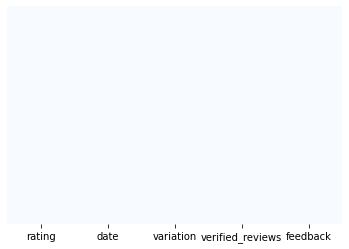

In [9]:
sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91414cfc10>,
      dtype=object)

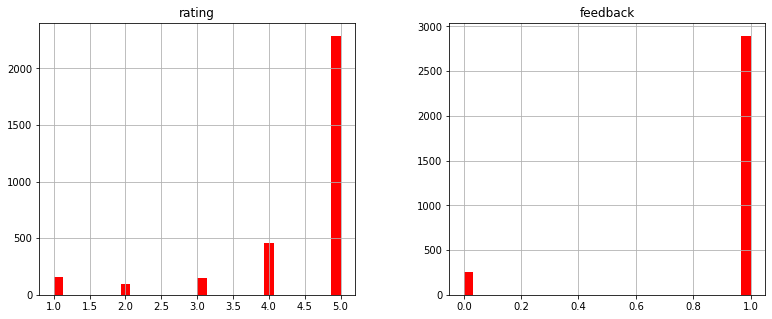

In [10]:
reviews_df.hist(bins=30, figsize=(13,5), color='r')

In [11]:
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [12]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


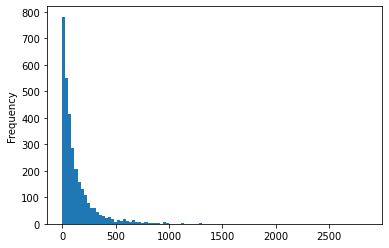

In [13]:
reviews_df['length'].plot(bins=100, kind='hist')

In [14]:
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [15]:
#longest
reviews_df[reviews_df['length']== 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [16]:
#shortest
reviews_df[reviews_df['length']== 1]['verified_reviews'].iloc[0]

'😍'

In [17]:
#mean
reviews_df[reviews_df['length']== 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

In [18]:
# seperate positive and negative reviews

positive = reviews_df[reviews_df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [19]:
negative = reviews_df[reviews_df['feedback']==0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


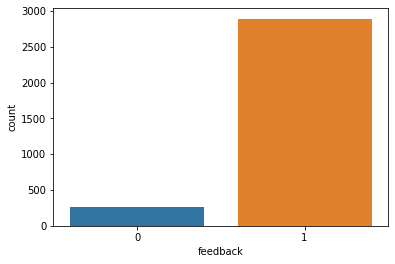

In [20]:
sns.countplot(reviews_df['feedback'], label='Count')

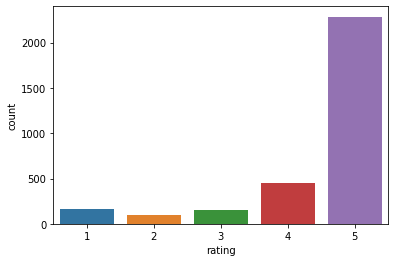

In [21]:
#ratings

sns.countplot(x='rating', data = reviews_df)

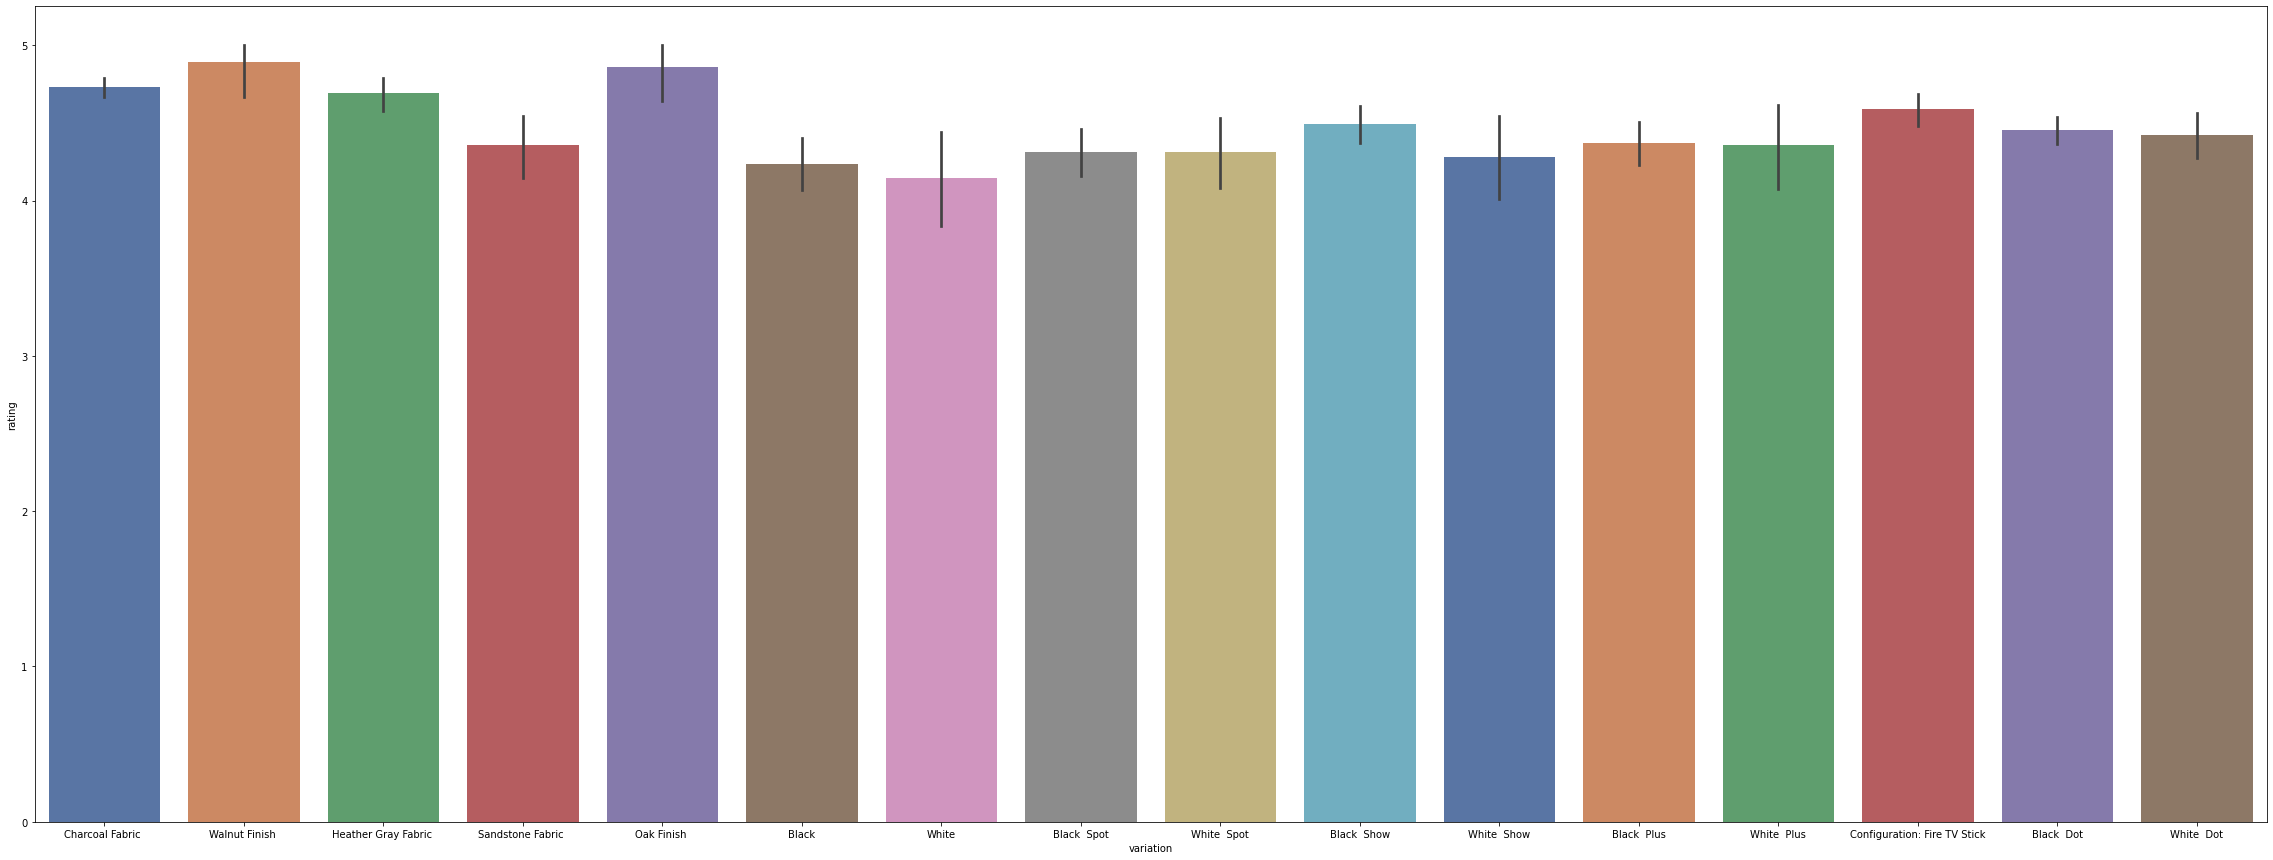

In [22]:
plt.figure(figsize=(40,15))
sns.barplot(x='variation', y='rating', data = reviews_df, palette='deep')

In [23]:
sentences = reviews_df['verified_reviews'].tolist()
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [24]:
sentences_as_one_string = " ".join(sentences)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

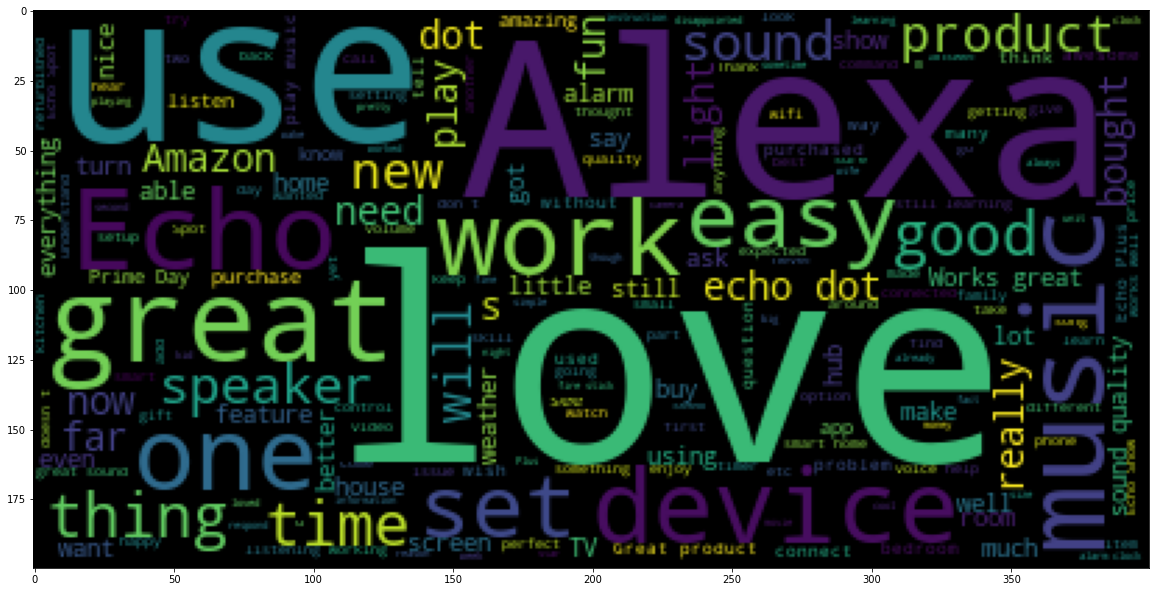

In [25]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))


In [26]:
negative_list = negative['verified_reviews'].tolist()

In [27]:
negative_sentences_as_one_string = " ".join(negative_list)

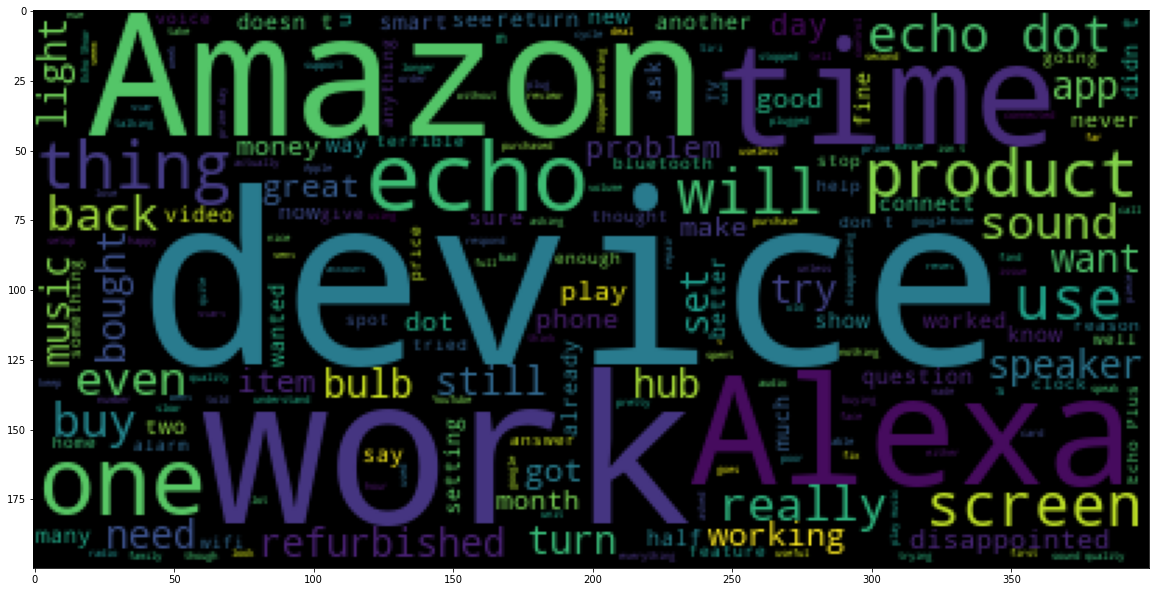

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# Perform Data Cleaning

In [29]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [30]:
reviews_df = reviews_df.drop(['date','rating','length'], axis=1)

In [31]:
reviews_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [32]:
# creating dummy variables

variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first=True)

In [33]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
reviews_df.drop(['variation'], axis=1, inplace=True)

In [35]:
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Learn how to remove punctuation from text

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
test = "Hello Mr. Future, I am so happy to be learning AI now!!"

In [38]:
test_punc_remove = [char for char in test if char not in string.punctuation]

In [39]:
test_punc_remove

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [40]:
test_punc_remove_join = ''.join(test_punc_remove)
test_punc_remove_join

'Hello Mr Future I am so happy to be learning AI now'

# Learn How to remove stopwords

In [41]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
test_punc_remove_join_clean = [ word for word in test_punc_remove_join.split()  if word.lower() not in stopwords.words('english')]

In [44]:
test_punc_remove_join_clean

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

# Understand how to perform count vectorization (Tokenization)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample_data)

In [46]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
print(x.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# Perform data cleaning by Applying Everything we learned.

In [48]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation (2) remove stopwords

def message_cleaning(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_removed_join_clean

In [49]:
# Let' test the newly added function

reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [52]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [53]:
print(reviews_df['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [54]:
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer= message_cleaning)
reviews_count_vectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [56]:
print(reviews_count_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [57]:
reviews_count_vectorizer.shape

(3150, 5211)

In [58]:
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)

In [59]:
reviews = pd.DataFrame(reviews_count_vectorizer.toarray())

In [60]:
reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [61]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X = reviews_df.drop(['feedback'], axis=1)

In [63]:
Y = reviews_df['feedback']

# Understand the theory and intuition behind the Naive Bayes classifier

*** Naive Bayes: Intuition ***

1. Naive Bayes is a classification technique based on Bayes Theorem.
2. Let's assume that you are data scientist working major bank in NYC and you want to classify a new client as eligible to retire or not.
3. Customer features are his /her age and salary.

*** Naive Bayes: Prior Probability ***
1. points can be classified as RED or BLue and our task is to classify a new point to RED or BLUE.
2. Prior Probability: Since we have more BLUE compared  to RED, we can assume that our new point is twice as likely to be BLUE Then RED. 


* prior probability for RED = Num of red points/total points = 20/60
* Prior Probability for BLUE = num of blue points / total points = 40/60

*** NAIVE BAYES: Likelihood ***

1. For the new point, if there are more BLUE points in its vicinity, it is more likely that the new point will be classified as BLUE.
2. So we draw a circle around the point.
3. Then we calculate the number of points in the circle belonging to each class label.

* likelihood of x being RED = Num of Red points in vicinity/ Total Num Red = 3/20
* likelihood of x being BLUE = Num of BLUE points in vicinity/ Total Num BLUE = 1/40

*** NAIVE BAYES: Posterior Probability ***

1. Let's combine prior probability and likelihood to create a posterior probability.
2. Prior Probability: Suggests that x may be classified as blue because there are twice as much blue points.
3. Likelihood: suggests that x is red because there are more red points in the vicinity of x.
4. Bayes Rule combines both to form a posterior probability.

* posterior probability RED = (20/60) * (3/20) = 1/20
* Posterior probability BLUE = (40/60) * (1/40) = 1/60

*** So, x classified as RED (NOn-retiring) since it has larger posterior probability ***




# Train Naive bayes classifier

In [64]:
X.shape

(3150, 5226)

In [65]:
Y.shape

(3150,)

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [73]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


MultinomialNB()

# Assess trained Model Performance

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
y_predict_train = NB_classifier.predict(x_train)
y_predict_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([1, 1, 1, ..., 1, 1, 1])

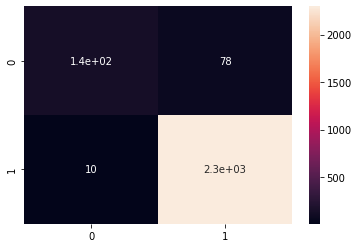

In [76]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


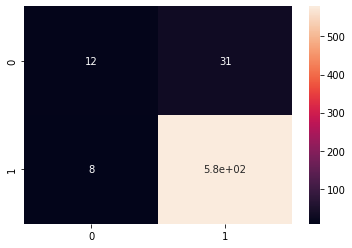

In [77]:
y_predict_test = NB_classifier.predict(x_test)
#y_predict_test
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [79]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.60      0.28      0.38        43
           1       0.95      0.99      0.97       587

    accuracy                           0.94       630
   macro avg       0.77      0.63      0.67       630
weighted avg       0.93      0.94      0.93       630



# Train and Evaluate Logistic Regression Classifier

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [86]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression()

In [87]:
y_pred = model.predict(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [88]:
print('Accuracy = {} %'.format(100*accuracy_score(y_pred,y_test)))

Accuracy = 94.6031746031746 %


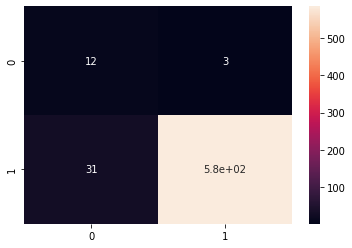

In [90]:
cm= confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.28      0.41        43
           1       0.95      0.99      0.97       587

    accuracy                           0.95       630
   macro avg       0.87      0.64      0.69       630
weighted avg       0.94      0.95      0.93       630



# Thank you for being with this case studies